In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bird baths in Australia

In [14]:
# load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-31/bird_baths.csv'
birds = pd.read_csv(url)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird_count
0,2014.0,Urban,South Eastern Queensland,Bassian Thrush,0
1,2014.0,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2,2014.0,Urban,South Eastern Queensland,Wild Duck,0
3,2014.0,Urban,South Eastern Queensland,Willie Wagtail,0
4,2014.0,Urban,South Eastern Queensland,Regent Bowerbird,0


Our **goal** is to predict the probability of whether we’ll see a bird at a bird bath in Australia, given info like what kind of bird we’re looking for and whether the bird bath is in an urban or rural location.

We'll focus on birds from the following list.

In [15]:
birds_list = [
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
]

**Part 1:** Filter out the bird types that are not on the `birds_list` list.

In [16]:
# your code here
birds = birds[birds['bird_type'].isin(birds_list)]

**Part 2:** Add a `bird` column to the DataFrame, where the value is `1` when `bird_count>0`, and `0` when `bird_count=0`.

In [17]:
# your code here
birds['bird'] = birds['bird_count'] > 0

Drop the `bird_count` column

In [18]:
# your code here
birds.drop(columns=['bird_count'], inplace=True)

**Part 3:** How likely are you to see birds of different types (Australian Magpie, Crested Pigeon,...) in different locations (rural, urban)?

**Hint**: use `pd.pivot_table`.

In [19]:
# your code here
probability = birds.pivot_table(index='bird_type', columns='urban_rural', values='bird', aggfunc='mean')
probability

urban_rural,Rural,Urban
bird_type,,
Australian Magpie,0.258503,0.282675
Crested Pigeon,0.095238,0.147416
Crimson Rosella,0.224490,0.135258
Eastern Spinebill,0.295918,0.100304
Grey Fantail,0.282313,0.060790
Lewin's Honeyeater,0.282313,0.075988
Magpie-lark,0.112245,0.193009
Noisy Miner,0.200680,0.354103
Pied Currawong,0.108844,0.189970


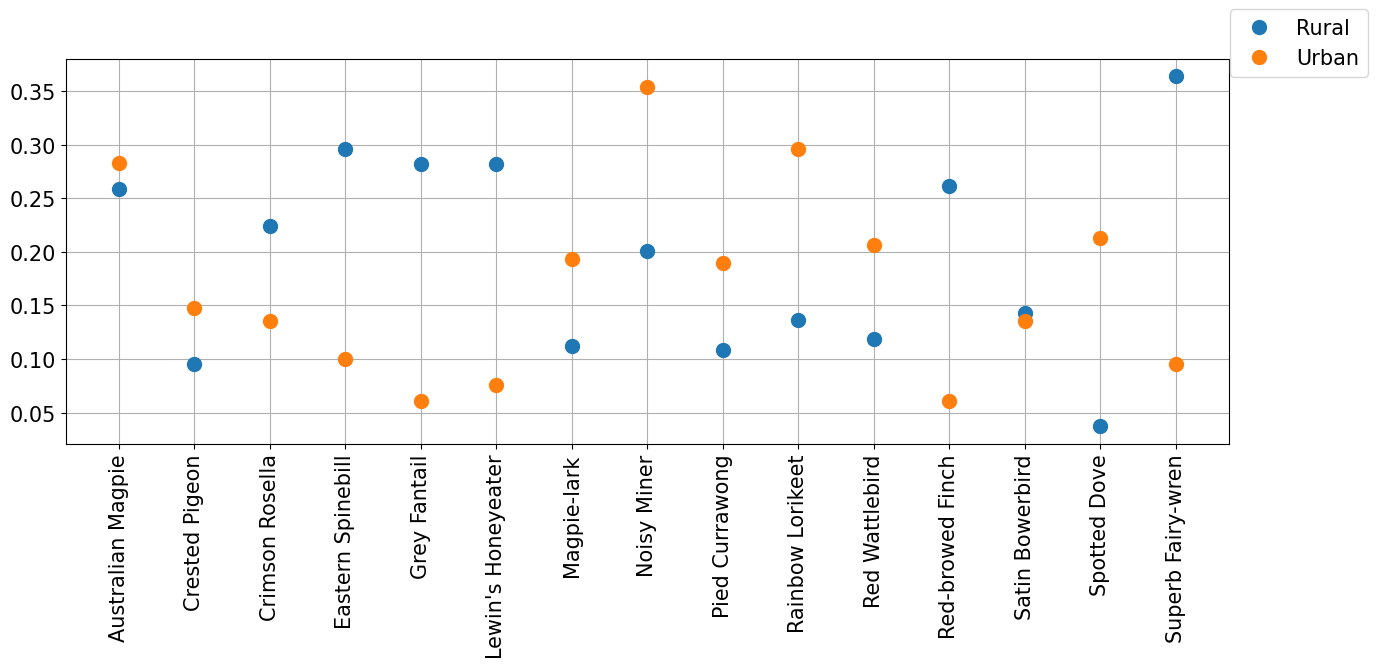

In [20]:
# run this cell to plot probabilities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(probability.Rural,'o',markersize='10', label='Rural')
ax.plot(probability.Urban,'o',markersize='10', label='Urban')
ax.grid(True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

We'll use the `urban_rural`, `bird_type` and `bioregions` features to predict these probabilities.

**Part 4:** Define the feature matrix X (columns `urban_rural`, `bird_type` and `bioregions`) and the target vector y (`bird` column) from the dataframe, and then split X and y into training and testing sets.

In [26]:
# your code here
from sklearn.model_selection import train_test_split

X = birds[['urban_rural', 'bird_type', 'bioregions']]
y = birds['bird']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Part 5:** build a pipeline with the following steps: an imputer, a one-hot-encoder, and a logistic regression model.

In [28]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# classification pipeline
categorical_features = ['urban_rural', 'bird_type', 'bioregions']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
])

pipe_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg_clf', log_reg)
])

pipe_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('logreg_clf', LogisticRegression())])

Fit your pipeline to the training data

In [29]:
# your code here
pipe_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('logreg_clf', LogisticRegression())])

Use the `predict_proba` method to compute the seeing-a-bird probability on the testing data.

In [30]:
# your code here
y_pred_proba = pipe_clf.predict_proba(X_test)

In [44]:
y_pred_proba.reshape(-1,1)[:len(X_test)]

array([[0.86020039],
       [0.13979961],
       [0.73257029],
       ...,
       [0.12172045],
       [0.86268428],
       [0.13731572]])

Run the following two cells.

In [45]:
# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_pred_proba.reshape(-1,1)[:len(X_test)]
results

,urban_rural,bird_type,bioregions,proba
92805,Urban,Eastern Spinebill,South Eastern Queensland,0.860200
81542,Urban,Australian Magpie,South Eastern Highlands,0.139800
79514,Rural,Australian Magpie,South Eastern Highlands,0.732570
141221,Urban,Rainbow Lorikeet,South Eastern Highlands,0.267430
138836,Rural,Pied Currawong,South Eastern Highlands,0.698527
...,...,...,...,...
45905,Urban,Rainbow Lorikeet,Sydney Basin,0.186385
130236,Urban,Rainbow Lorikeet,NSW South Western Slopes,0.878280
117718,Urban,Crested Pigeon,Sydney Basin,0.121720
23535,Rural,Crimson Rosella,NSW North Coast,0.862684


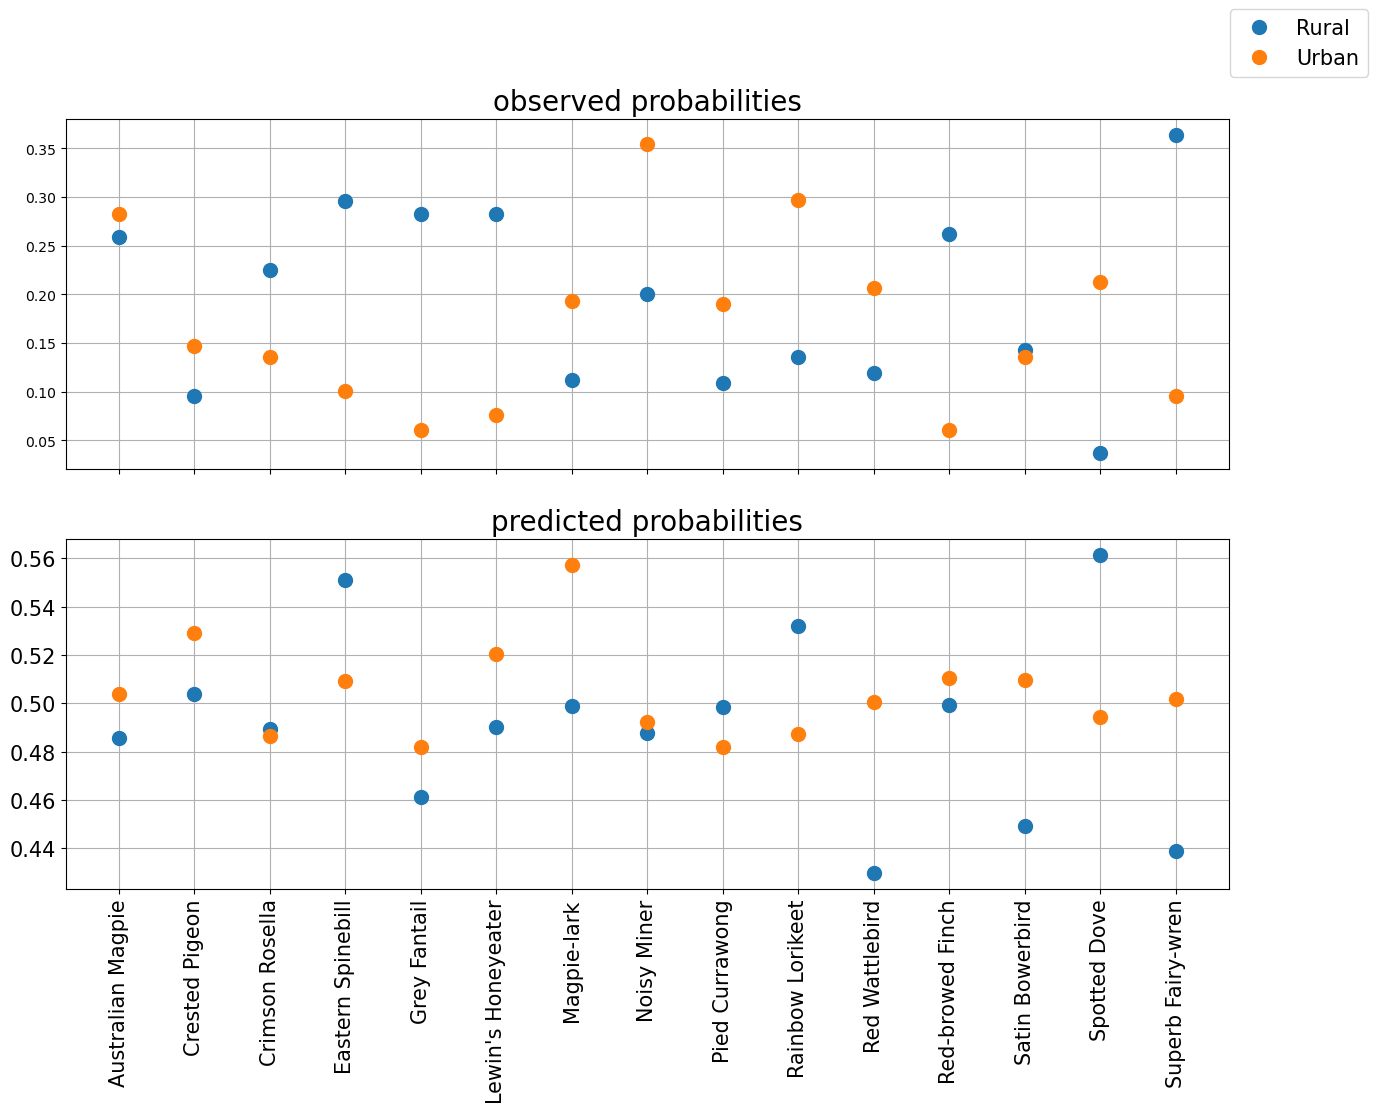

In [46]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

The predicted probabilities don't look great. 

**Part 6:** Add polynomial features (of degree 2) to your pipeline, and repeat **Part 5**

In [52]:
# your code here
from sklearn.preprocessing import PolynomialFeatures

log_reg = LogisticRegression(max_iter=2000)

# classification pipeline
categorical_features = ['urban_rural', 'bird_type', 'bioregions']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
])

pipe_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('logreg_clf', log_reg)
])

pipe_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('poly_features', PolynomialFeatures()),
                ('logreg_clf', LogisticRegression(max_iter=2000))])

In [55]:
y_pred = pipe_clf.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8273642977056519

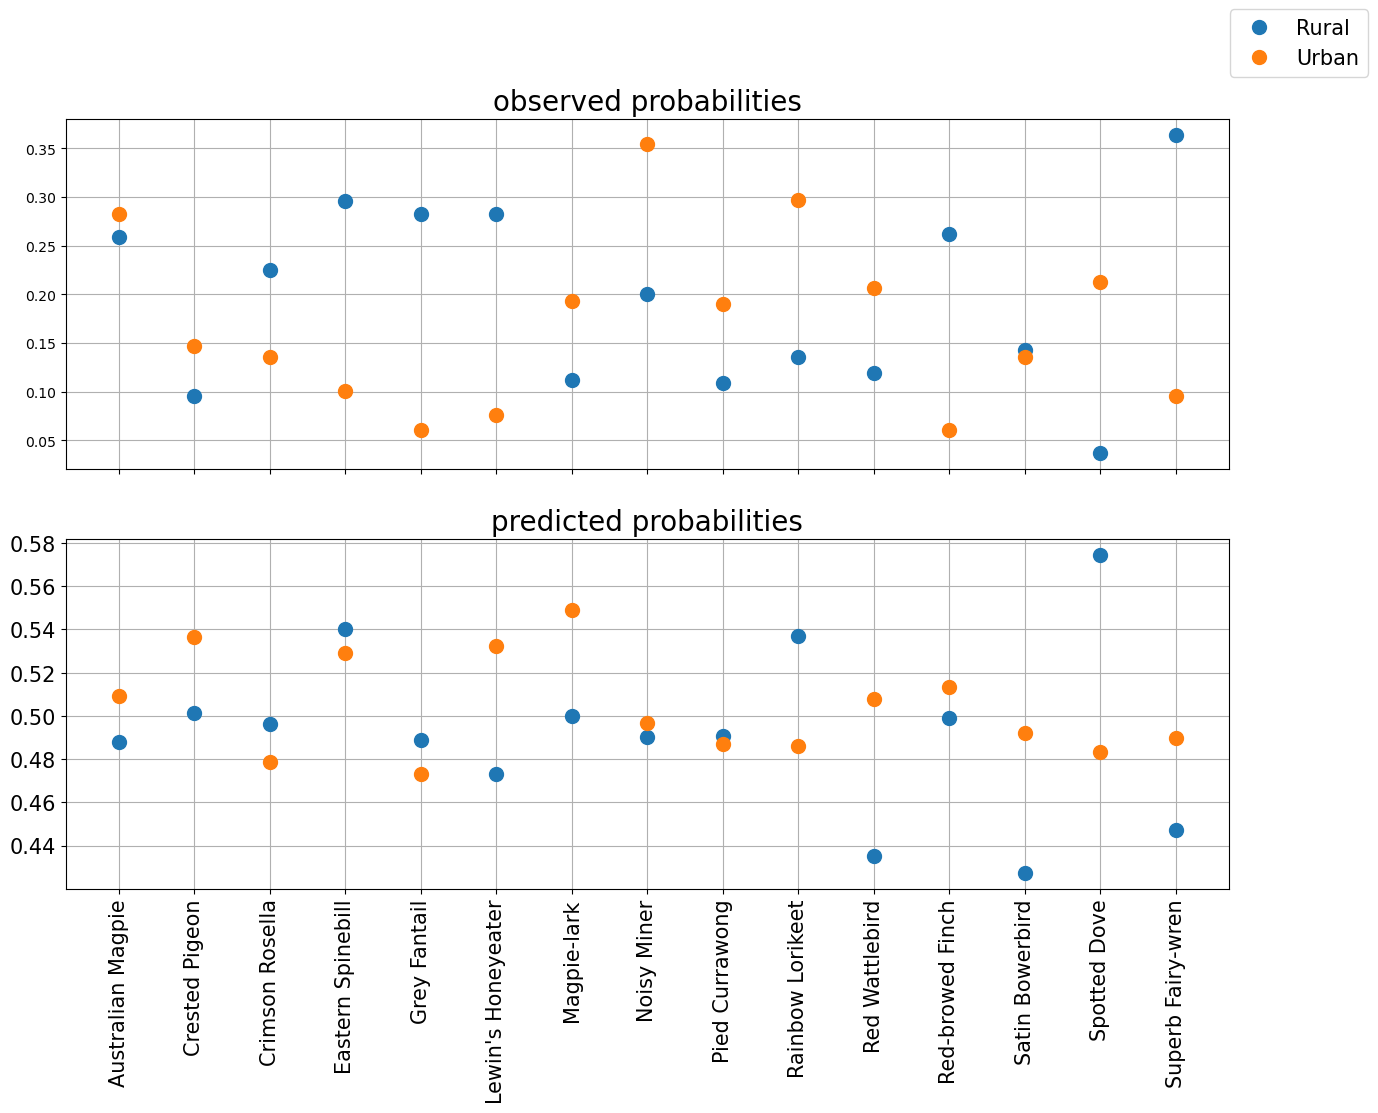

In [53]:
# your code here
y_pred_proba = pipe_clf.predict_proba(X_test)

# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_pred_proba.reshape(-1,1)[:len(X_test)]
results

# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()